In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [3]:
bank_df = pd.read_csv('bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [6]:
bank_df.subscribed.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [7]:
## we have imbalnce dataset like if we get accuracy 88% we may have unsubscibed customer into subscibed

In [ ]:
#One approach to deal with imbalanced dataset is bootstrapping. It involves resampling techniques 
# such as upsampling and downsampling. 

In [10]:
from sklearn.utils import resample
#seperate the bank subscribe of yes-no
bank_subscribed_yes = bank_df[bank_df.subscribed == 'no']
bank_subscribed_no = bank_df[bank_df.subscribed =='yes']
##upsample the yes-subscribed cases
df_minority_upsampled = resample(bank_subscribed_yes,replace= True,n_samples = 200)
new_bank_df = pd.concat([bank_subscribed_no,df_minority_upsampled])

In [13]:
from sklearn.utils ib
mport shuffle
new_bank_df = shuffle(new_bank_df)

In [16]:
X_features = list(new_bank_df.columns)
X_features.remove('subscribed')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [17]:
#encode all the categorical variables
encoded_bank_df = pd.get_dummies(new_bank_df[X_features],
                                drop_first = True)
X = encoded_bank_df

In [18]:
Y = new_bank_df.subscribed.map(lambda x: int(x == 'yes'))

In [20]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y,test_y = train_test_split(X,Y,test_size = 0.3,
                                                  random_state = 42)

In [22]:
# we use logistic Model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(train_X,train_y)

C:\Users\Manikanth Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
pred_y = logit.predict(test_X)

In [34]:
# Confusion matrix
from sklearn import metrics
def draw_cm(actual,predicted):
    cm = metrics.confusion_matrix(actual,predicted,labels = [1,0])
    sn.heatmap(cm,annot= True,fmt = '.2f',
              xticklabels = ['Subscribed','Not subscribed'],
              yticklabels = ['Subscribed','Not subscribed'])
    plt.ylabel("True label")
    plt.xlabel('predicted label')
    plt.show()
    

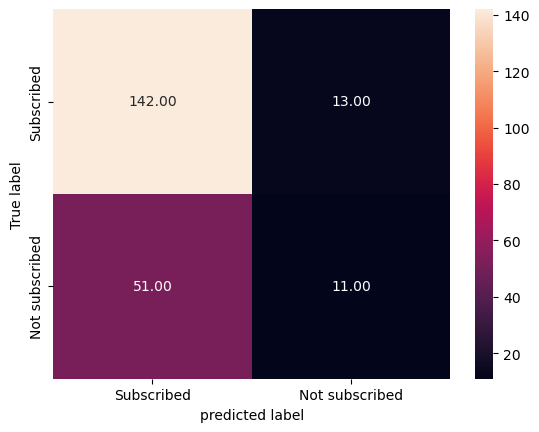

In [35]:
cm = draw_cm(test_y, pred_y)

In [37]:
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.46      0.18      0.26        62
           1       0.74      0.92      0.82       155

    accuracy                           0.71       217
   macro avg       0.60      0.55      0.54       217
weighted avg       0.66      0.71      0.66       217



In [32]:
con_mt = metrics.confusion_matrix(test_y,pred_y)

In [33]:
con_mt

array([[ 11,  51],
       [ 13, 142]], dtype=int64)

In [39]:
#bulding KNN
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_X,train_y)

KNeighborsClassifier()

In [45]:
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.46      0.18      0.26        62
           1       0.74      0.92      0.82       155

    accuracy                           0.71       217
   macro avg       0.60      0.55      0.54       217
weighted avg       0.66      0.71      0.66       217

